# DS Homework 3

## Nimra Sohail ns06867

In [37]:
import pandas as pd
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline

In [38]:
df = pd.read_csv("loan_small.csv")
df.head(2) 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL


In [39]:
df.shape

(999, 47)

In [40]:
df.count()

id                         999
member_id                  999
loan_amnt                  999
funded_amnt                999
funded_amnt_inv            999
term                       999
int_rate                   999
installment                999
grade                      999
sub_grade                  999
emp_title                  948
emp_length                 982
home_ownership             999
annual_inc                 999
verification_status        999
issue_d                    999
loan_status                999
pymnt_plan                 999
purpose                    999
title                      999
zip_code                   999
addr_state                 999
dti                        999
delinq_2yrs                999
earliest_cr_line           999
inq_last_6mths             999
mths_since_last_delinq     225
mths_since_last_record      20
open_acc                   999
pub_rec                    999
revol_bal                  999
revol_util                 999
total_ac

# Checking Duplicates

In [41]:
sum(df.duplicated()) #it means there are no suplicated rows in this data.

0

# Checking how many null values are in each column

In [42]:
df.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                   51
emp_length                  17
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
purpose                      0
title                        0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
mths_since_last_delinq     774
mths_since_last_record     979
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_ac

# First exclude the term "months" from each row in the attribute "term"

In [43]:
df['term'] = df['term'].str.replace(r'\bmonths\b', '', regex=True)
df['term']=df['term'].astype(int)
df['term'].dtypes
df['term']

0      36
1      60
2      36
3      36
4      60
       ..
994    36
995    36
996    36
997    36
998    60
Name: term, Length: 999, dtype: int32

In [44]:
df = df.rename(columns={'term':'term(months)'})
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term(months),int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL


# now excluding the + and < from 10+ years and <1 years from 'emp_length' column

In [45]:
d1=df['emp_length'].copy()
for i in range(len(df['emp_length'])):
    x=d1.iloc[i]
    #print(d1.iloc[i])
    if x=='10+ years': 
        d1.iloc[i] = '15' #this is my policy I am assigning people who has worked more than 10 years to have work expeirnce 15 indicating they have the highest work experience
    elif x == '< 1 year': 
        d1.iloc[i] = '0' #this is again my policy, people with less than 1 year exerince have essentially no experince. A strict strategy.
d1=d1.str.replace(' years','')
d1=d1.str.replace(' year','')
d1=d1.fillna(d1.median()) #replace the load installments in months with median value
d1=d1.astype(int)
# so basically i have first converted the emp_length into clean data by removing 10+ and <1 and then years are replaced with empty strings. The null values are replaced with median values and finally the column is converted into an int type.
## we would assign d1 to df['emp_length'] at last

# now we will convert fully paid, charged off, and current,.. from "loan_status" column
Settled: Indicates loans that have been completely paid off.
Default: Represents loans that have not been paid according to the agreed terms.
Ongoing: Refers to loans that are currently active and in good standing.
Nonpayment: Signifies loans where payments have not been made as required.
Overdue: Denotes loans with payments that are past their due date by 31-120 days.

In [46]:
d2=df['loan_status'].copy()
df['loan_status'].unique()
#Fully Paid -> Settled
#Charged Off -> Default
#Current -> Ongoing
#Default -> Nonpayment
#Late (31-120 days) -> Overdue
for i in range(len(d2)):
    x=d2.iloc[i]
    #print(d1.iloc[i])
    if x=='Fully Paid': 
        d2.iloc[i] = 'Settled' #done with loan installments
    elif x == 'Charged Off': 
        d2.iloc[i] = 'Default' #the borrower has failed to make payments
    elif x == 'Current': 
        d2.iloc[i] = 'Ongoing' #the borrower has failed to make payments
    elif x == 'Default': 
        d2.iloc[i] = 'Nonpayment' #the borrower has failed to make payments
    elif x == 'Late (31-120 days)': 
        d2.iloc[i] = 'Overdue' #the borrower has failed to make payments
## as a customer behavious, the nan values can be replaced with mode as there would eb a central tendency in people to fall in one category
d2=d2.str.strip()# to remove white spaces
d2=d2.fillna(d1.mode())
d2.unique()
#d2.isnull().sum()
##we would make teh d2 column equal at end to teh roiginal column

array(['Settled', 'Default', 'Ongoing', 'Nonpayment', 'Overdue'],
      dtype=object)

# now filling in missing values for mths_since_last_delinq and mths_since_last_record

In [47]:
d3=df['mths_since_last_delinq']
d3.dtypes #float type
d4=df['mths_since_last_record']
d4.dtypes #float type
a=d3.mean()
b=d3.mode()[0]
c=d3.median()

x=d4.mean()
y=d4.mode()[0]
z=d4.median()
print("for d3: ",a," ",b," ",c)
print("for d4: ",x," ",y," ",z)
#since mean median and mode for both d3 and d4 dont vary much hence i would prefer replacing null values with mean as its close to mode and median
d3.fillna(a, inplace = True)
d4.fillna(x, inplace = True)
#d4.isnull().sum()

for d3:  41.11555555555555   38.0   40.0
for d4:  87.0   83.0   91.0


# now since we addressed teh cleaning issues as the question1 suggested now we will clean the rest of the columns by filling in missing values for it


In [48]:
df.isnull().sum()

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term(months)                0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                  51
emp_length                 17
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
purpose                     0
title                       0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
mths_since_last_delinq      0
mths_since_last_record      0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_li

In [49]:
# this tells us that emp_title and last_pymnt_d also needs to be filled

In [50]:
d5=df['emp_title']
d5.fillna("Not Specified", inplace = True)

In [51]:
d6=df['last_pymnt_d']
#d6[d6.isnull()].index
d6.fillna(d6.mode()[0],inplace=True)

In [52]:
##lastly we assign all cleaned values back to teh original table

In [53]:
df['emp_length']=d1
df['loan_status']=d2
df['mths_since_last_delinq']=d3
df['mths_since_last_record']=d4
df['emp_title']=d5
df['last_pymnt_d']=d6
df['annual_inc']=df['annual_inc'].astype(int) #i want to see only integer values of income 
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term(months)               0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp     

In [54]:
##the table is cleaned now.

# Generating appropriate summary (count, mean, median or mode) tables using group keyword in pandas. 

In [55]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term(months)', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [56]:
group=df.copy()
group.groupby(['home_ownership', 'loan_status']).agg({'annual_inc': ['mean','min','max']})

annual_inc               
                                    mean    min     max
home_ownership loan_status                             
MORTGAGE       Default      72833.428571  30000  235000
               Nonpayment   62000.000000  62000   62000
               Ongoing      77253.885714  25000  175000
               Overdue      50000.000000  50000   50000
               Settled      74817.104418  17108  235000
OWN            Default      51629.714286  12000  108000
               Ongoing      56641.333333  34848   85000
               Settled      57887.163636  12996  155000
RENT           Default      50208.416667  15000  160000
               Ongoing      63733.520000  26000  195000
               Overdue      70000.000000  70000   70000
               Settled      56527.472941  12252  276000

##### Borrowers who own their homes (OWN) generally have lower variation in their incomes compared to those with mortgages or who are renting. This might indicate a greater level of financial stability among home owners.
##### Among different types of home ownership (mortgage, own, and rent), individuals with mortgages who are actively repaying their loans tend to have higher incomes. This may imply that mortgage holders generally have higher earning capacities.

In [57]:
df['grade'].unique
#'B', 'C', 'A', 'E', 'F', 'D', 'G' these are the grades
df.groupby(['grade'])['annual_inc'].median().nlargest(60).reset_index(name="Annual Income")

,grade,Annual Income
0,F,76800.0
1,E,69000.0
2,G,61000.0
3,C,54990.0
4,A,54500.0
5,B,52000.0
6,D,51162.0


In [58]:
df.groupby(['grade'])['annual_inc'].mean().nlargest(60).reset_index(name="Annual Income")

,grade,Annual Income
0,F,79710.285714
1,E,75939.638889
2,G,73200.000000
3,B,61429.271186
4,C,60124.256039
5,D,60024.362319
6,A,59772.544554


In [59]:
df.groupby(['grade'])['annual_inc'].max().nlargest(60).reset_index(name="Annual Income")

,grade,Annual Income
0,A,276000
1,C,235000
2,E,235000
3,B,231252
4,D,208000
5,F,137000
6,G,120000


#### this is giving me a rough idea that there are employed people in teh dataset with certain grades of the employement they are doing. This outcomes can suggest that the if lets suppose we categorize them based on annual incomes then if we look in term sof maximum income that can be misleading. as in that way A has the highest annual income. However this categorization portrays the outliers mainly that are on the high end of income. A better way is to use median and mean. Through median and mean its easy to interpret that grade F,E, G employees have the highest annual incomes with F having the highest annual_income

In [60]:
df.groupby(['grade'])[['annual_inc', 'loan_amnt']].mean().astype(int)

,annual_inc,loan_amnt
grade,,
A,59772,10771
B,61429,11762
C,60124,12293
D,60024,13523
E,75939,20120
F,79710,18825
G,73200,19390


#### Borrowers in grades E, F, and G have higher mean annual incomes ranging from dollar 73,200 to dollar 79,710. They also apply for substantially larger loans, ranging from approximately dollar 18,825 to dollar 20,120. This suggests that borrowers in these grades might have very big goals. As they have high annual income they would be (might be) able to pay bakc the high amount of loan they are taking. Their can be various reasons like high cost of living, unforseen circumstances etc. 

In [61]:
df.groupby('purpose')['grade'].value_counts().reset_index(name="Number of times grade emplyee has applied for a purpose")

,purpose,grade,Number of times grade emplyee has applied for a purpose
0,car,B,10
1,car,A,5
2,car,C,5
3,car,D,1
4,car,E,1
...,...,...,...
56,vacation,E,1
57,wedding,B,3
58,wedding,D,3
59,wedding,A,2


In [62]:
result = df.groupby(['purpose', 'grade']).size().reset_index(name="Number of times grade employee has applied for a purpose")
result = result.sort_values(by='Number of times grade employee has applied for a purpose', ascending=False)
result = result.groupby('purpose').first().reset_index()
result = result.sort_values(by='Number of times grade employee has applied for a purpose', ascending=True)
result

,purpose,grade,Number of times grade employee has applied for a purpose
9,renewable_energy,B,1
4,house,C,2
7,moving,C,3
12,wedding,D,3
11,vacation,B,4
6,medical,B,5
5,major_purchase,A,7
10,small_business,A,9
0,car,B,10
3,home_improvement,A,10


#### this shows that grade B employees who intially as we saw didnt also had good annual_income are the ones with mostly applying to debt_consolidation. Ironic how only one employee is taking loan for renewable_energy.

# visualizations for Univariate analysis

In [63]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term(months)', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

## Univariate analysis for annual income

<Axes: >

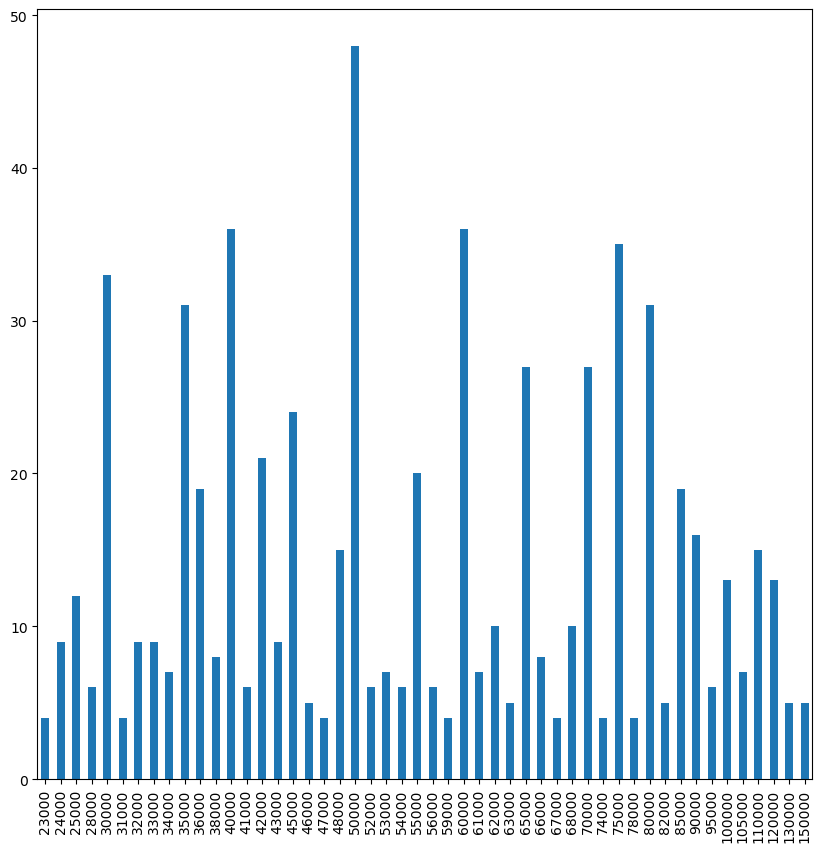

In [64]:
a = df['annual_inc'].value_counts().nlargest(50)
a = a.sort_index()
a.plot(kind='bar', figsize=(10,10))

Text(0.5, 1.0, 'Distribution of Annual Income')

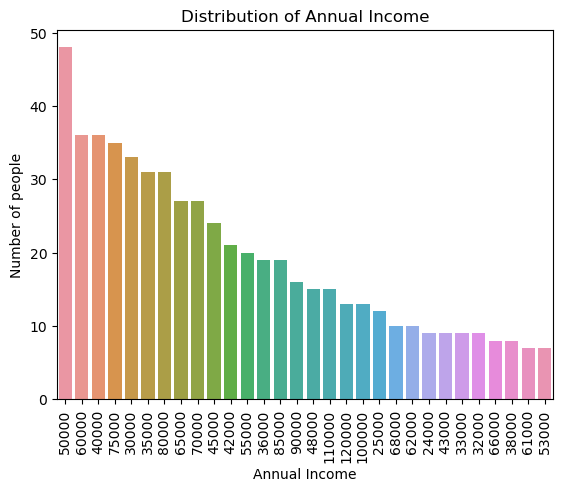

In [65]:
ax = sns.countplot(x ='annual_inc', data = df, order=df['annual_inc'].value_counts()[:30].index)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Annual Income')  # Set x-axis label
ax.set_ylabel('Number of people')  # Set y-axis label
plt.title('Distribution of Annual Income') #setting title

#### it can be seen that in the above bar graph a very simple only one attribute is considered which is the annual income. Using the counts we see how many people have that particular annual income. From the above bar graph, it can be said that most people have annual income of 50,00 dollars in the given data set.

Text(0.5, 1.0, 'Distribution of Annual Income')

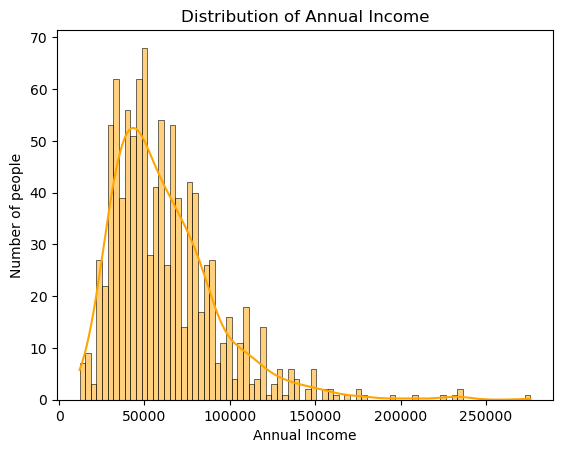

In [66]:
ax=sns.histplot(df['annual_inc'], kde=True, color='orange', stat='count',bins=80)
ax.set_ylabel('Number of people')  # Set y-axis label
ax.set_xlabel('Annual Income')  # Set x-axis label
plt.title('Distribution of Annual Income') #setting title

#### even with histogram on the data multivariate data we analyze the same trend, most people have the 50,000 dollar annual income. We also observe here than this is a skewed histograph. It means that mostly people had annual incomes from 0 to 150,000 dollars after which the number of people who have even higher annual income or the rich people are few.

## univariate analysis for reason of loan

Text(0.5, 1.0, 'Distribution of purpose of loan')

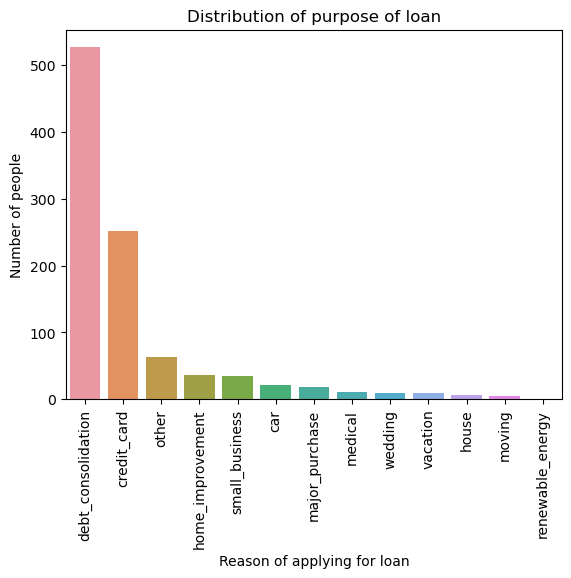

In [67]:
ax = sns.countplot(x ='purpose', data = df, order=df['purpose'].value_counts()[:30].index)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Reason of applying for loan')  # Set x-axis label
ax.set_ylabel('Number of people')  # Set y-axis label
plt.title('Distribution of purpose of loan') #setting title

In [68]:
df['purpose'].value_counts()

debt_consolidation    527
credit_card           252
other                  63
home_improvement       37
small_business         35
car                    22
major_purchase         19
medical                11
wedding                10
vacation               10
house                   7
moving                  5
renewable_energy        1
Name: purpose, dtype: int64

Text(0.5, 1.0, 'Distribution of purpose of loan')

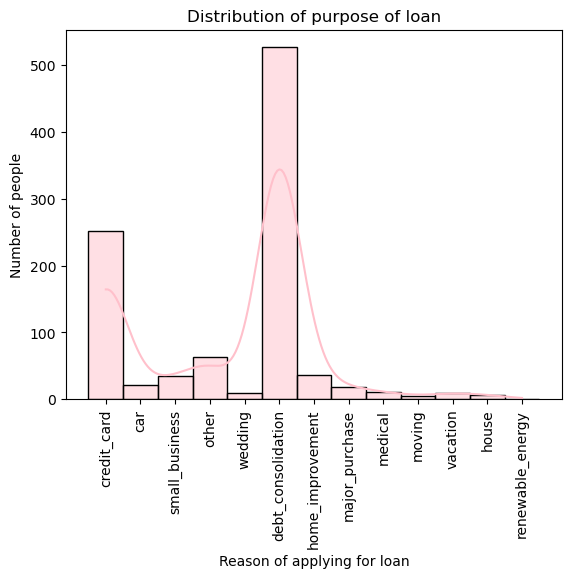

In [69]:
ax=sns.histplot(df['purpose'], kde=True, color='pink', stat='count',bins=80)
ax.set_xlabel('Reason of applying for loan')  # Set x-axis label
ax.set_ylabel('Number of people')  # Set y-axis label
ax.tick_params(axis='x', rotation=90)
plt.title('Distribution of purpose of loan') #setting title

#### based on the bar graph and the histogram for the purpose of loan it can be seen that mostly people are applying for loans because they want to pay off debts. Ironic, how we have to take loan and get into more debts. 

# Bivariate Analysis

## scatter plots and correlation values (continuous vs continuous)

### Annual income and installments

<Axes: xlabel='annual_inc', ylabel='installment'>

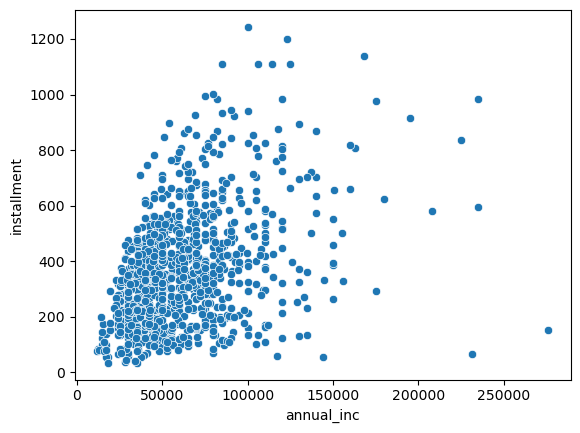

In [70]:
sns.scatterplot(data=df, x="annual_inc", y="installment")

0.391627942835309

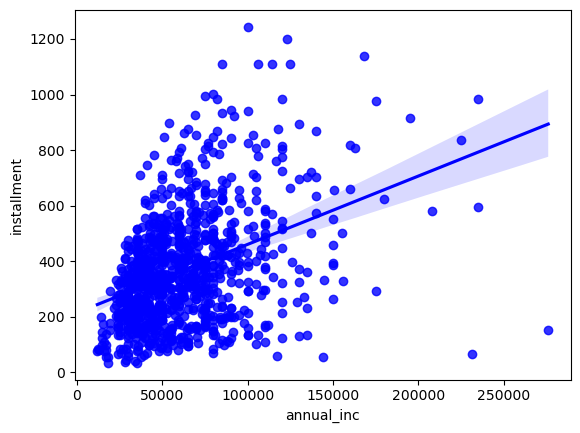

In [71]:
sns.regplot(data=df, x="annual_inc", y="installment", color='blue')
correlation = df["annual_inc"].corr(df["installment"])
correlation

#### The correlation coefficient between annual income and loan installments is approximately 0.39. This positive correlation suggests that as annual income increases, there is a tendency for the monthly installments to also increase. In practical terms, this means that individuals with higher annual incomes are likely to be approved for larger loan amounts, resulting in higher monthly payments.  we see that annual_income and installments for the loan are weakly corelated with correlation value being closed to 0.

### annual income and loan amount

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

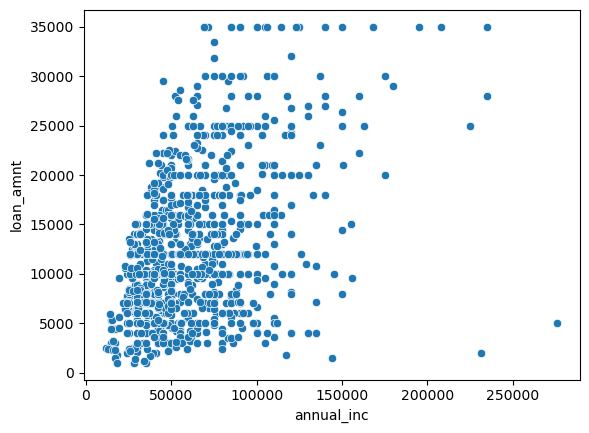

In [72]:
sns.scatterplot(data=df, x="annual_inc", y="loan_amnt")

0.4276314795228662

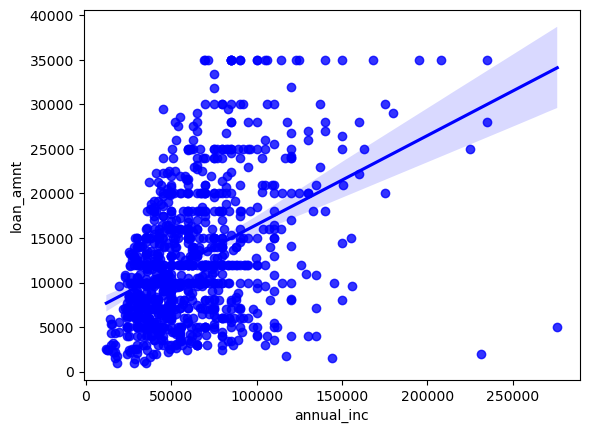

In [73]:
sns.regplot(data=df, x="annual_inc", y="loan_amnt", color='blue')
correlation = df["annual_inc"].corr(df["loan_amnt"])
correlation

#### The correlation coefficient between annual income (x="annual_inc") and loan amount (y="loan_amnt") is approximately 0.43. This positive correlation suggests that as a borrower's annual income increases, they are more likely to be approved for larger loan amounts. This relationship aligns with the expectation that individuals with higher incomes may have greater borrowing capacity.However again the correlation is nt strongly correlated

## visulization discrete vs continous

In [74]:
### box plots

Text(0.5, 1.0, 'Box Plot: Grade(discrete/categorical) vs Annual Income(continous)')

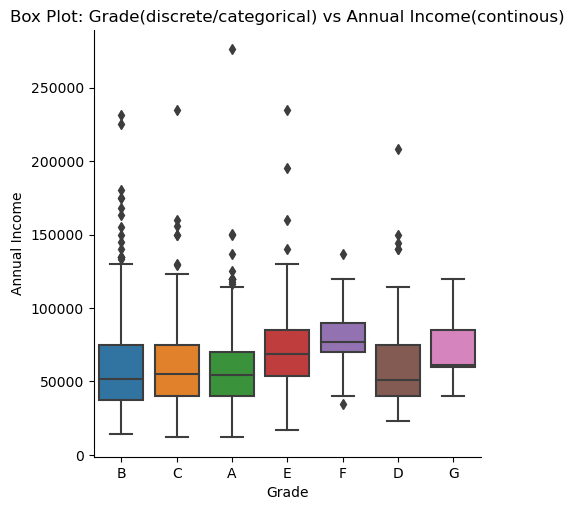

In [75]:
sns.catplot(data=df, x='grade', y='annual_inc', kind='box')
plt.xlabel('Grade')
plt.ylabel('Annual Income')
plt.title('Box Plot: Grade(discrete/categorical) vs Annual Income(continous)')

##### It can be seen in the above box plot that for all categorical grades A,B,C,D,E,F,G we have a continous mapping of annual income for each grade category. We can see that grade F has the highest mean for annual income while grade A has an outlier that shows the maximum annual income from grade A employee thats very very far from mean annual income of grade A employees.

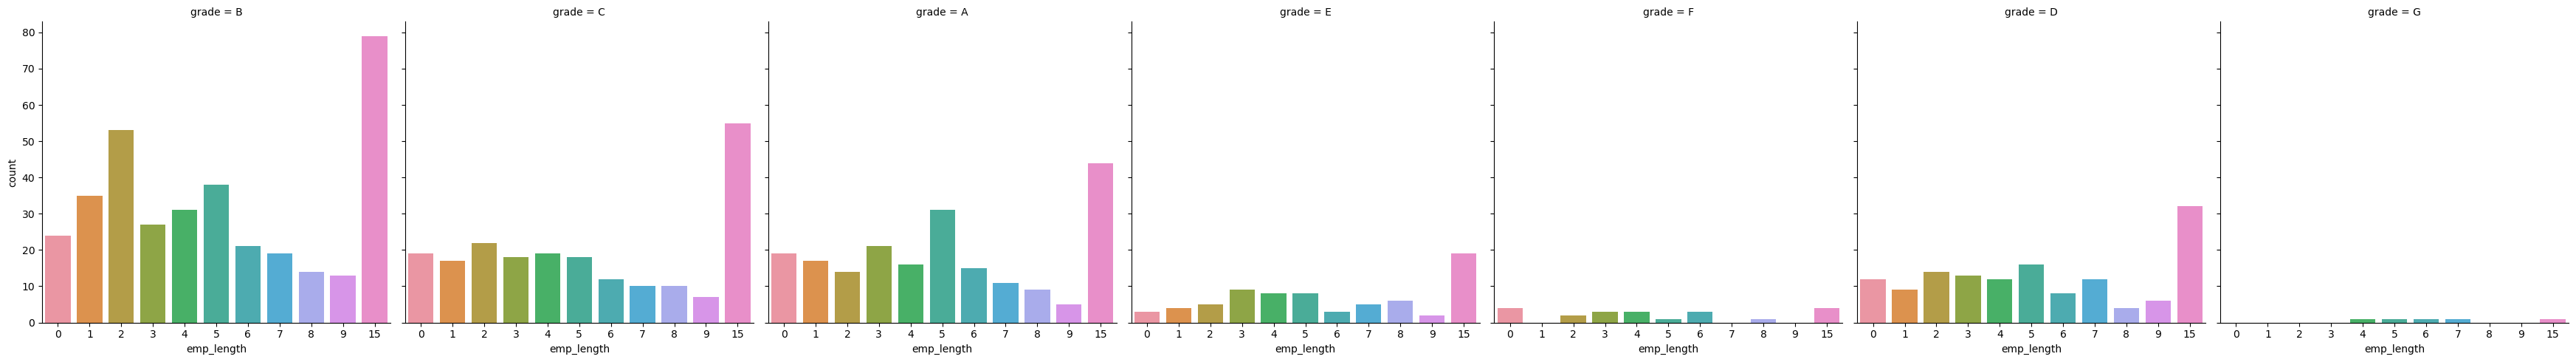

In [88]:
sns.catplot(data=df, x='emp_length', col='grade',kind='count',aspect=1)

#### the above bivarite graphs having employemnt length as numerical continous data and grade as categorical or discrete data shows that grade B has the highest number of employees whith the highest number of employemnt length in years.

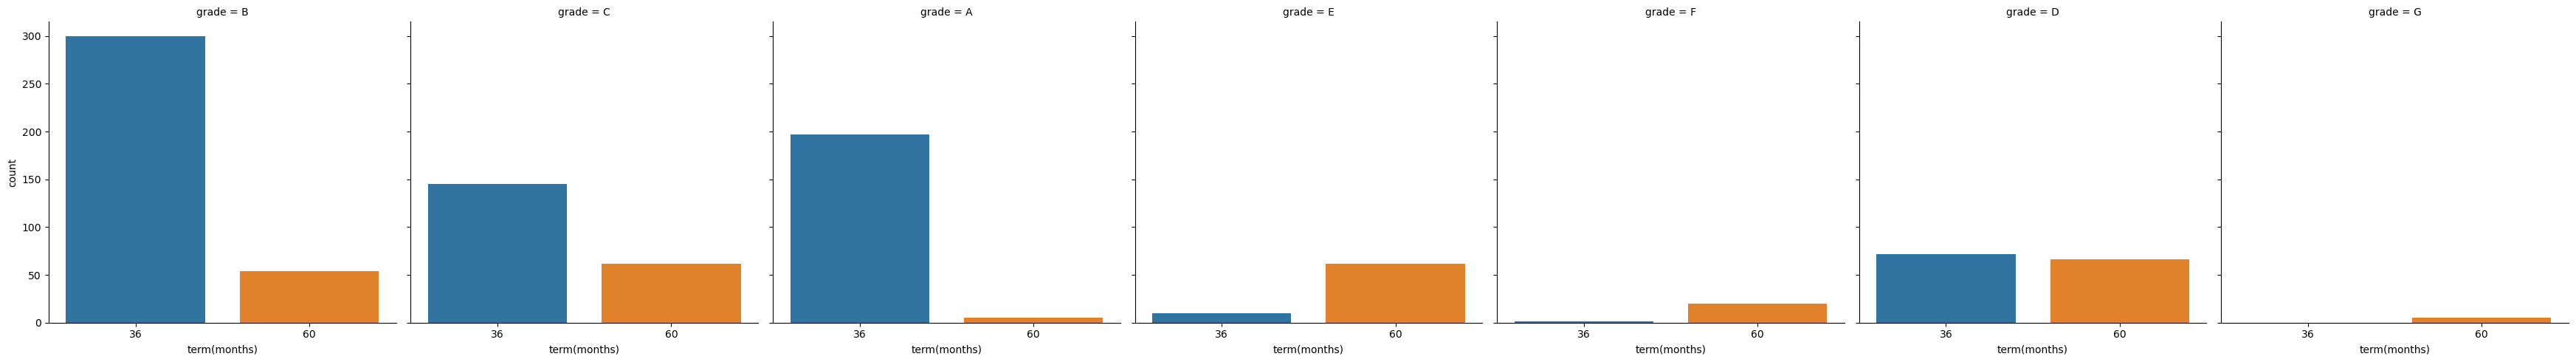

In [89]:
sns.catplot(data=df, x='term(months)', col='grade',kind='count',aspect=1)

#### In this context, the term length indicates the duration for which a borrower is expected to repay the loan. In teh above graphs, it can be seen that employees with grade B have the highest count of term length being 30 months within which they have to return the loan. other grade employees have lower term length count of 30 months.  Employees with grade B may be perceived as having a more stable financial situation, which allows them to commit to shorter loan terms.

## Correlation plot

<Axes: >

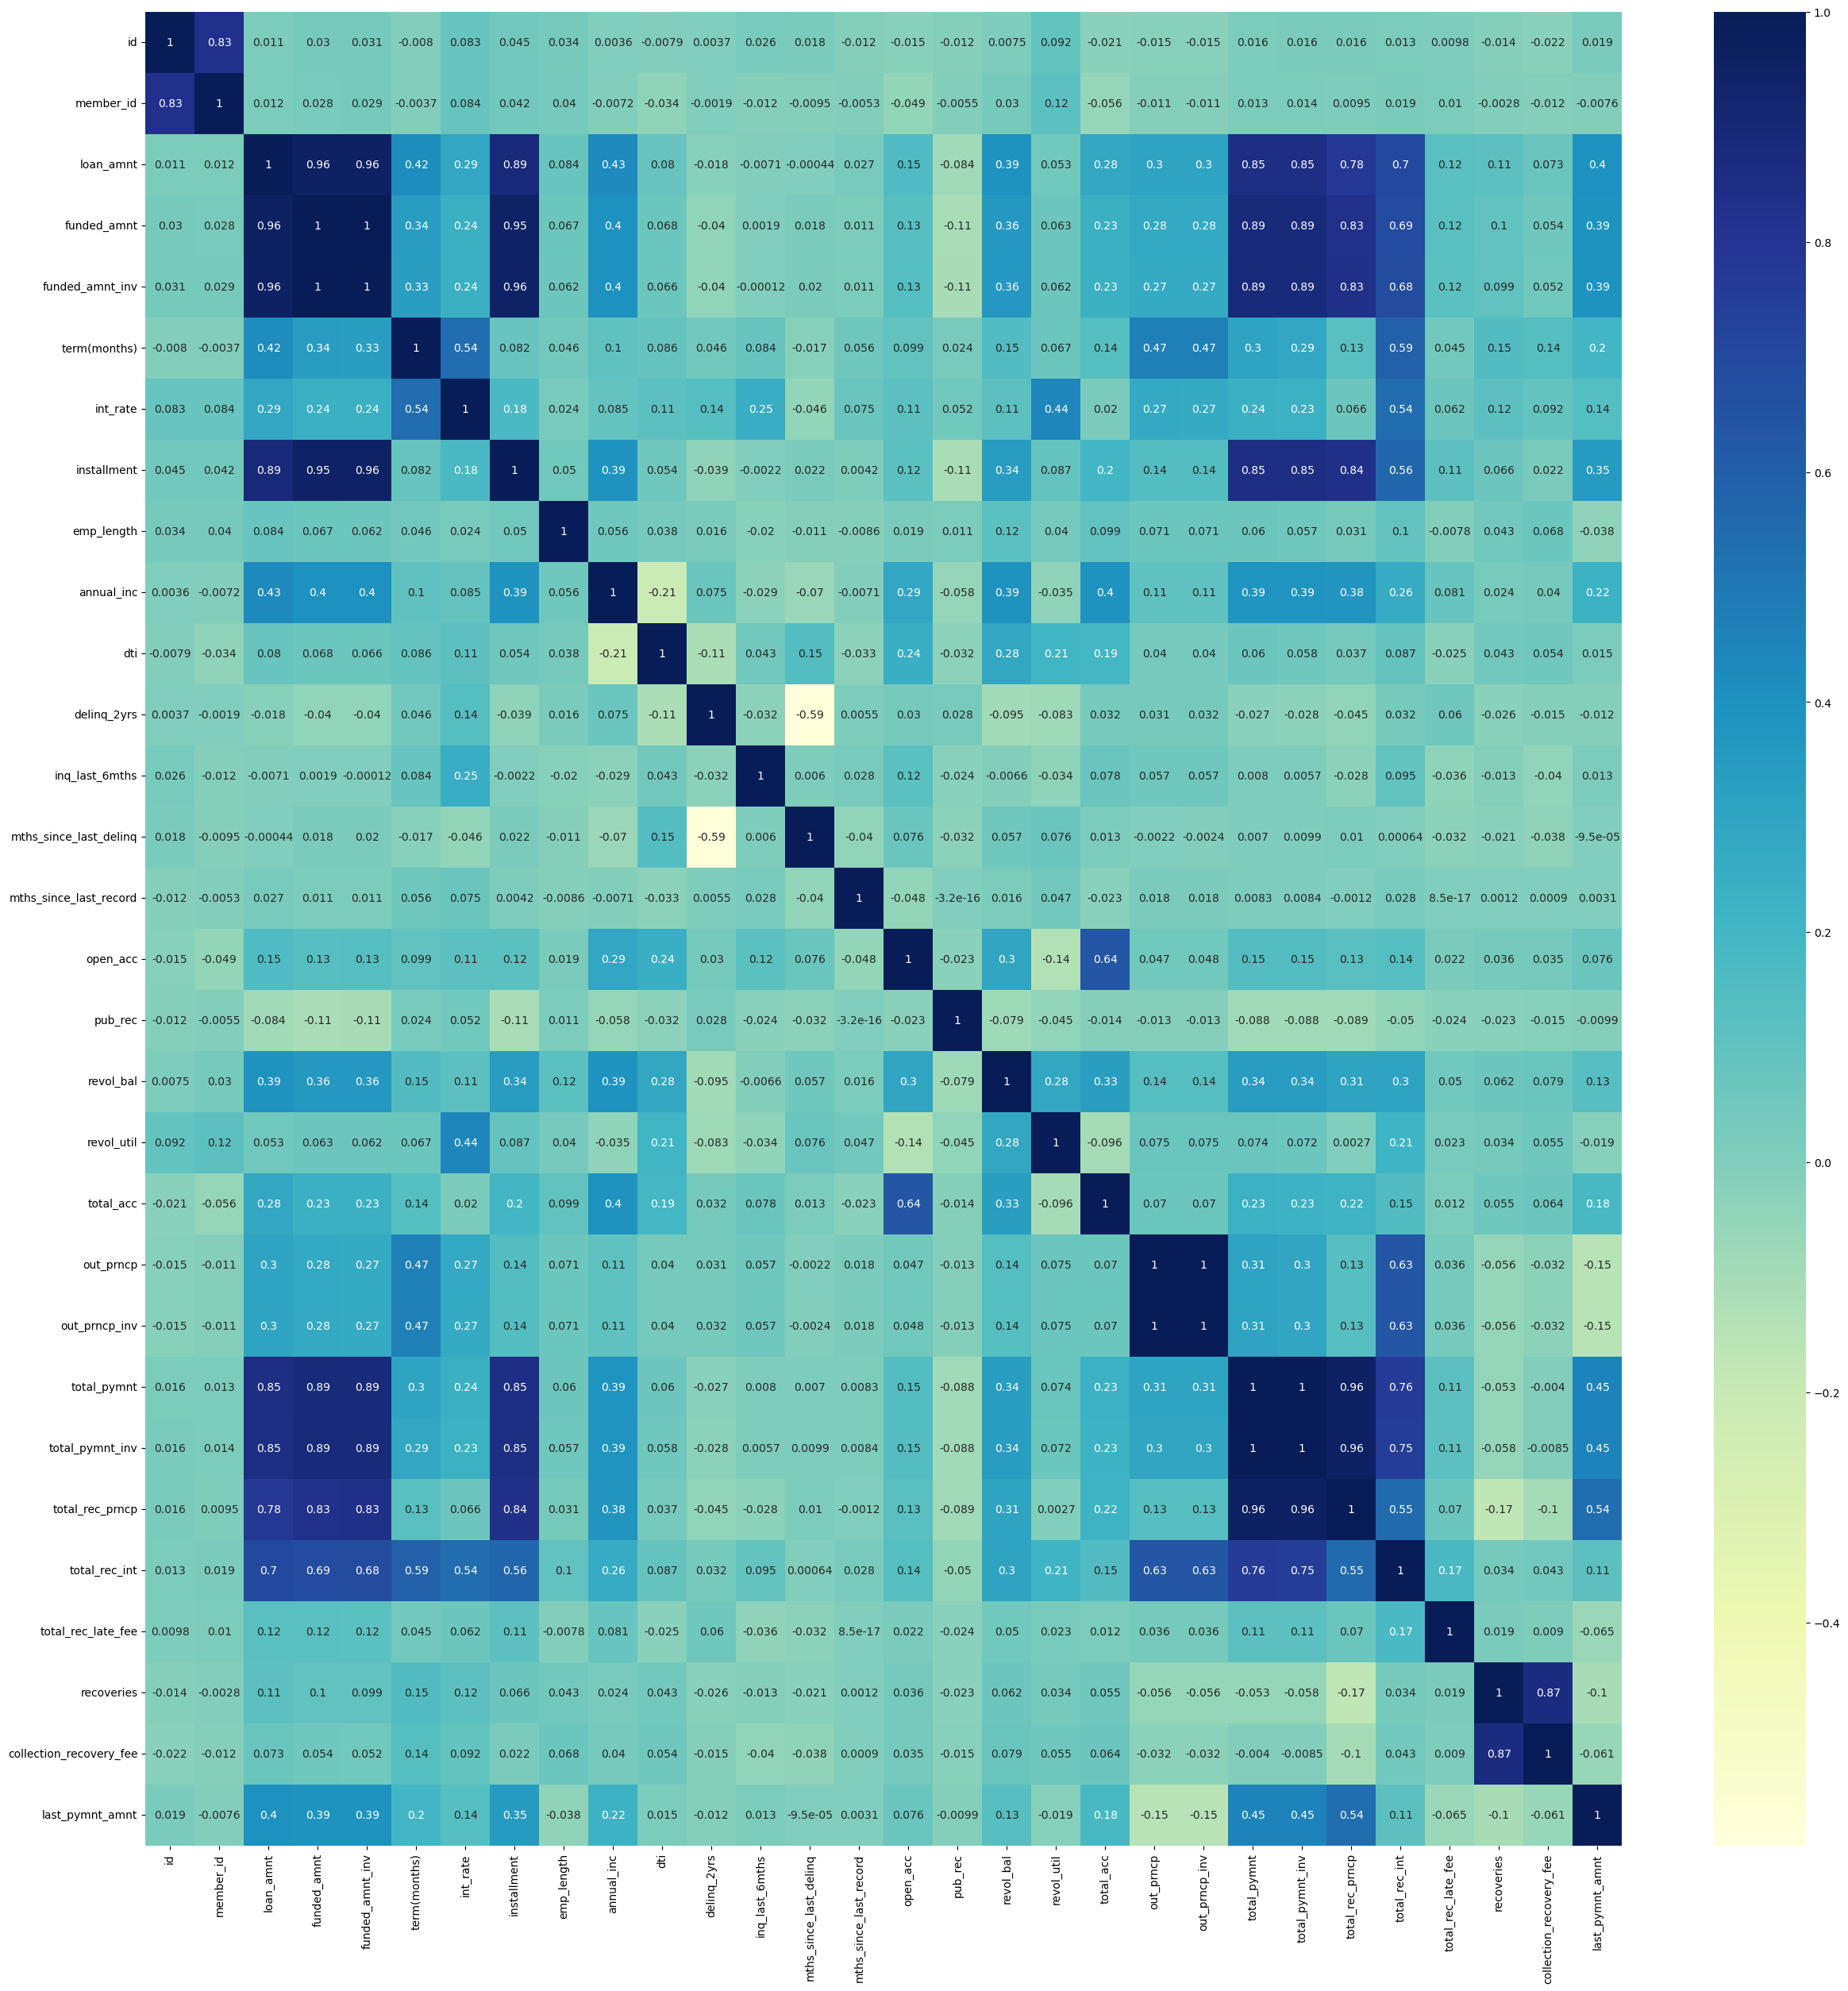

In [93]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(numeric_only=True),cmap='YlGnBu',annot=True)

#### this correlation plot is huge because the data to be correlated is huge. Even within which only numeric vaues are corelated. However lets correlate load amount with funded amount. A correlation of 0.96 is very high, indicating a strong positive linear relationship between "Loan Amount" and "Funded Amount." This means that as one variable increases, the other tends to increase proportionally. In this context, it suggests that the amount funded is very close to the actual loan amount requested by borrowers. This could be an indication of a well-functioning lending process where borrowers are typically receiving the amount they requested. Then if we see correlation between interest rate and months since last delinquency we can see a correlation of -0.046 is very close to zero, indicating a very weak negative linear relationship between "Interest Rate" and "Months Since Last Delinquency." This means that there is little to no discernible pattern in the relationship between these two variables. In this context, it suggests that there is no clear association between the interest rate charged and the number of months since the last delinquency. This could imply that interest rates are determined by other factors unrelated to delinquency history.

# Multivariate Analysis

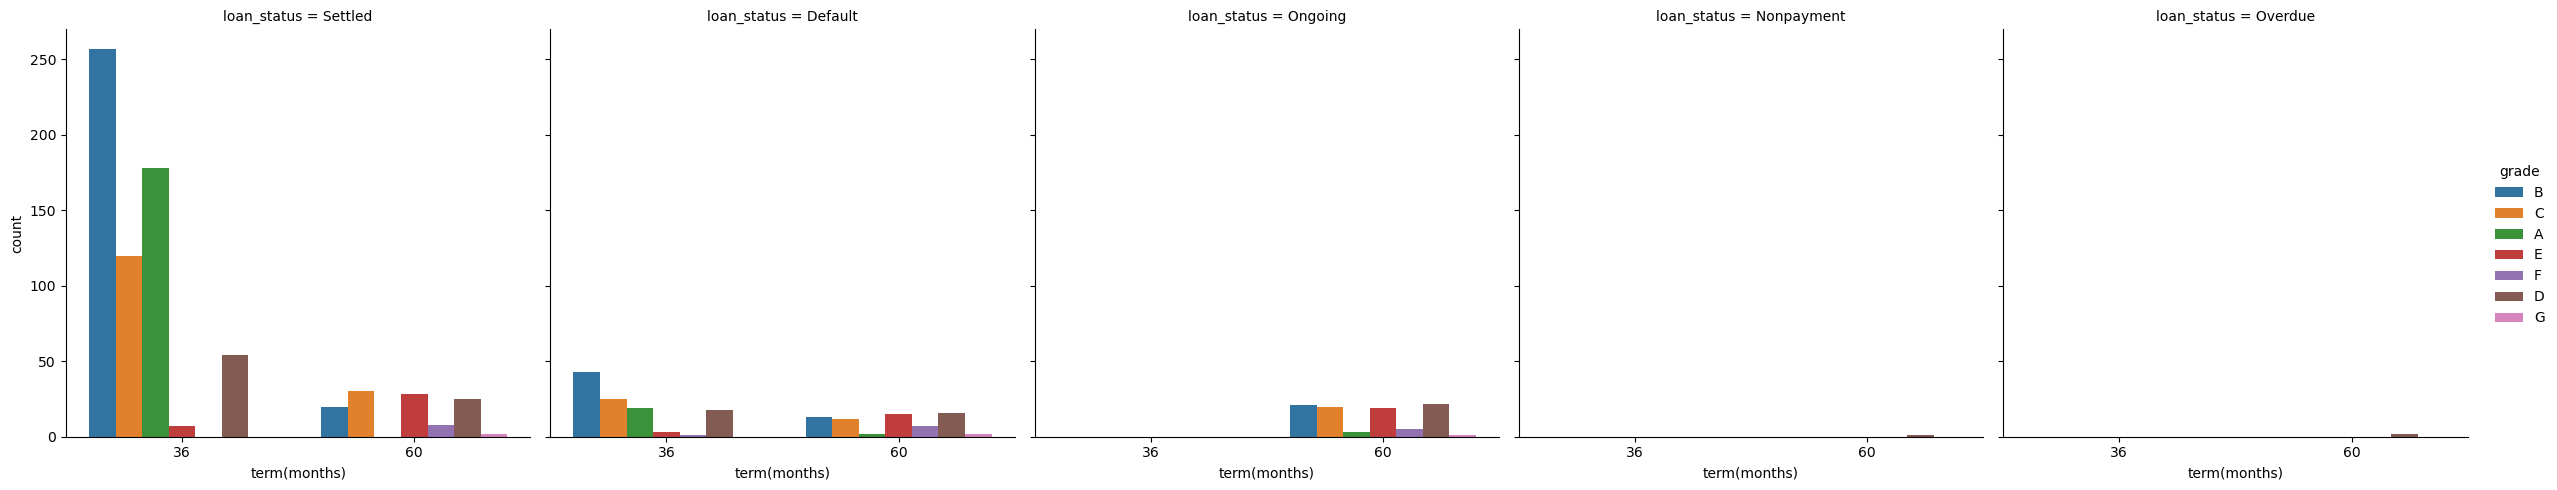

In [96]:
sns.catplot(data=df, x='term(months)', col='loan_status',hue='grade',kind='count',aspect=1)

#### This indicates that among settled loans, the majority have a term length of 36 months and are associated with employees graded as B.Borrowers with grade B may have a preference for shorter loan terms. This could be because they have the financial stability and capacity to repay loans within a shorter period as evident from most of them also lying in settled category.Grade B employees may be considered lower risk, as reflected in the high proportion of settled loans. Lenders may have confidence in their ability to repay loans within the 36-month period.